In [4]:
# Importing all the libraries
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
print(os.listdir('C:/Users/parit/Internship/Data/cats-and-dogs'))

['test', 'train']


In [5]:
# Defining the parameters
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [6]:
# One-hot encoding (Cats as 0 & Dogs as 1)
filenames = os.listdir("C:/Users/parit/Internship/Data/cats-and-dogs/train")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [10]:
df.tail()

,filename,category
24995,dog.9995.jpg,1
24996,dog.9996.jpg,1
24997,dog.9997.jpg,1
24998,dog.9998.jpg,1
24999,dog.9999.jpg,1


In [11]:
df.head()

,filename,category
0,cat.0.jpg,0
1,cat.1.jpg,0
2,cat.10.jpg,0
3,cat.100.jpg,0
4,cat.1000.jpg,0


<AxesSubplot:>

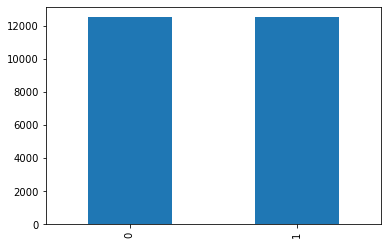

In [15]:
df['category'].value_counts().plot.bar()

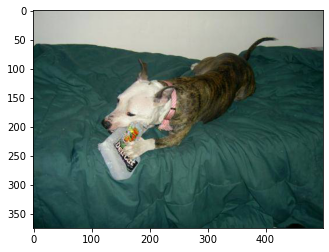

In [18]:
# Viewing a random image from the train folder
sample = random.choice(filenames)
image = load_img("C:/Users/parit/Internship/Data/cats-and-dogs/train/"+sample)
plt.imshow(image)

In [19]:
# CNN model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0

In [21]:
# Replacing the categories as Cat and Dog.
df["category"] = df["category"].replace({0: 'cat', 1: 'dog'}) 

In [22]:
# Splitting and assigning the data to variables train_df and validate_df.
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

<AxesSubplot:>

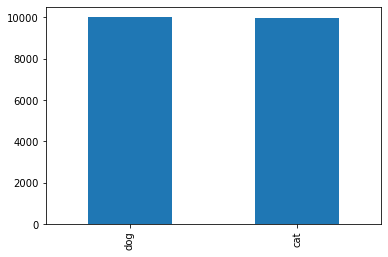

In [23]:
train_df['category'].value_counts().plot.bar()

<AxesSubplot:>

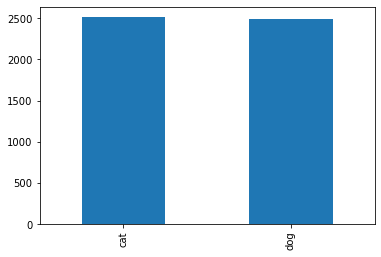

In [24]:
validate_df['category'].value_counts().plot.bar()

In [25]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15

In [26]:
# Data Augmentation and assigining the values of train data to train_df variable.
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "C:/Users/parit/Internship/Data/cats-and-dogs/train", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 20000 validated image filenames belonging to 2 classes.


In [27]:
# Data Augmentation and assigining the values of train data to train_df variable.
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "C:/Users/parit/Internship/Data/cats-and-dogs/train", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 5000 validated image filenames belonging to 2 classes.


In [29]:
# Checking for the working of the data augmentation part.
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    "C:/Users/parit/Internship/Data/cats-and-dogs/train", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


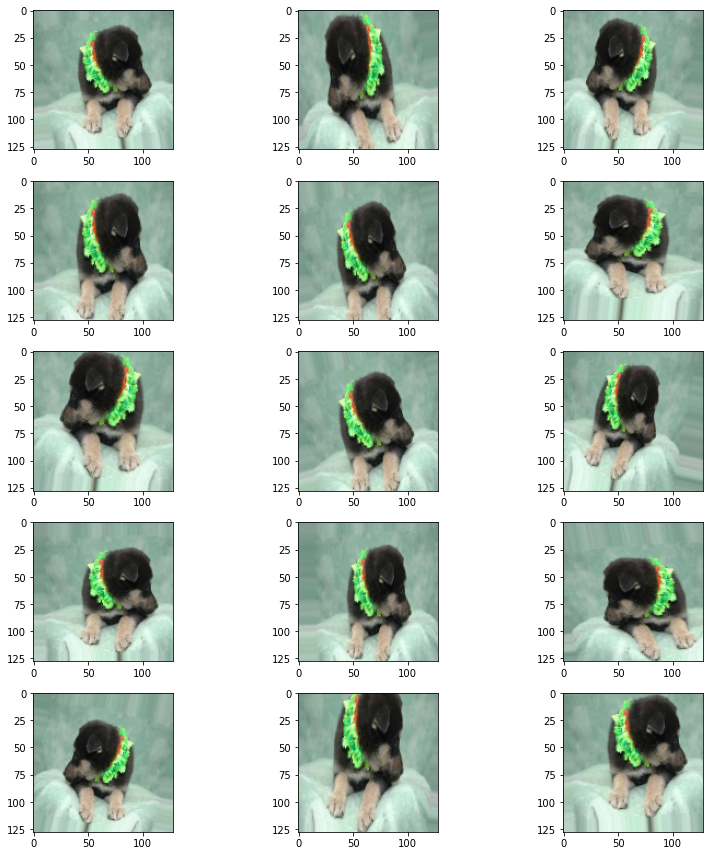

In [30]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [32]:
# Fitting/Training the model.
epochs=3 if FAST_RUN else 10
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
)

Epoch 1/10
1333/1333 [==============================] - 646s 485ms/step - loss: 0.5499 - accuracy: 0.7212 - val_loss: 0.6266 - val_accuracy: 0.6979
Epoch 2/10
1333/1333 [==============================] - 611s 459ms/step - loss: 0.5378 - accuracy: 0.7340 - val_loss: 0.4235 - val_accuracy: 0.8030
Epoch 3/10
1333/1333 [==============================] - 602s 451ms/step - loss: 0.4993 - accuracy: 0.7620 - val_loss: 0.4555 - val_accuracy: 0.7810
Epoch 4/10
1333/1333 [==============================] - 604s 453ms/step - loss: 0.4696 - accuracy: 0.7778 - val_loss: 0.3946 - val_accuracy: 0.8268
Epoch 5/10
1333/1333 [==============================] - 590s 443ms/step - loss: 0.4414 - accuracy: 0.7933 - val_loss: 0.5621 - val_accuracy: 0.7664
Epoch 6/10
1333/1333 [==============================] - 591s 444ms/step - loss: 0.4251 - accuracy: 0.8069 - val_loss: 0.5927 - val_accuracy: 0.7544
Epoch 7/10
1333/1333 [==============================] - 590s 442ms/step - loss: 0.4303 - accuracy: 0.8010 - val_

In [33]:
# Saving the model weights for future use.
model.save_weights("model.h5")

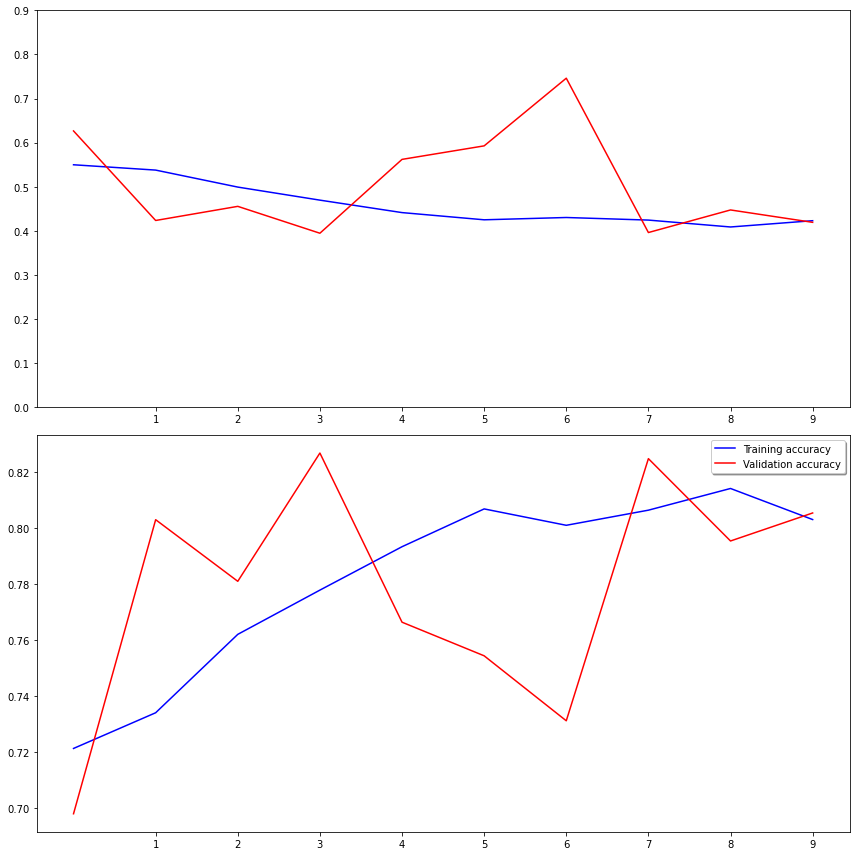

In [35]:
# Plotting Graphs (Training loss vs Validation loss) & (Training accuracy vs Validation Accuracy)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [38]:
# Defining the path for the test data.
test_filenames = os.listdir("C:/Users/parit/Internship/Data/cats-and-dogs/test")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

In [40]:
# Data augmentation and assignment to test_generator variable.
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "C:/Users/parit/Internship/Data/cats-and-dogs/test", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

Found 200 validated image filenames.


In [42]:
# Predicting the model.
predict = model.predict(test_generator, steps=np.ceil(nb_samples/batch_size))

In [43]:
# Using argmax we - return the indices of the maximum values along the axis. 
test_df['category'] = np.argmax(predict, axis=-1)

In [44]:
# Labelling the data acc. to the training.
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

In [45]:
# Replacing the string dog nd cat with binary values (0,1). 
test_df['category'] = test_df['category'].replace({ 'dog': 1, 'cat': 0 })

<AxesSubplot:>

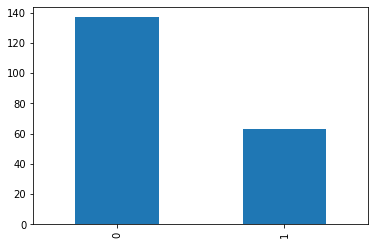

In [46]:
test_df['category'].value_counts().plot.bar()

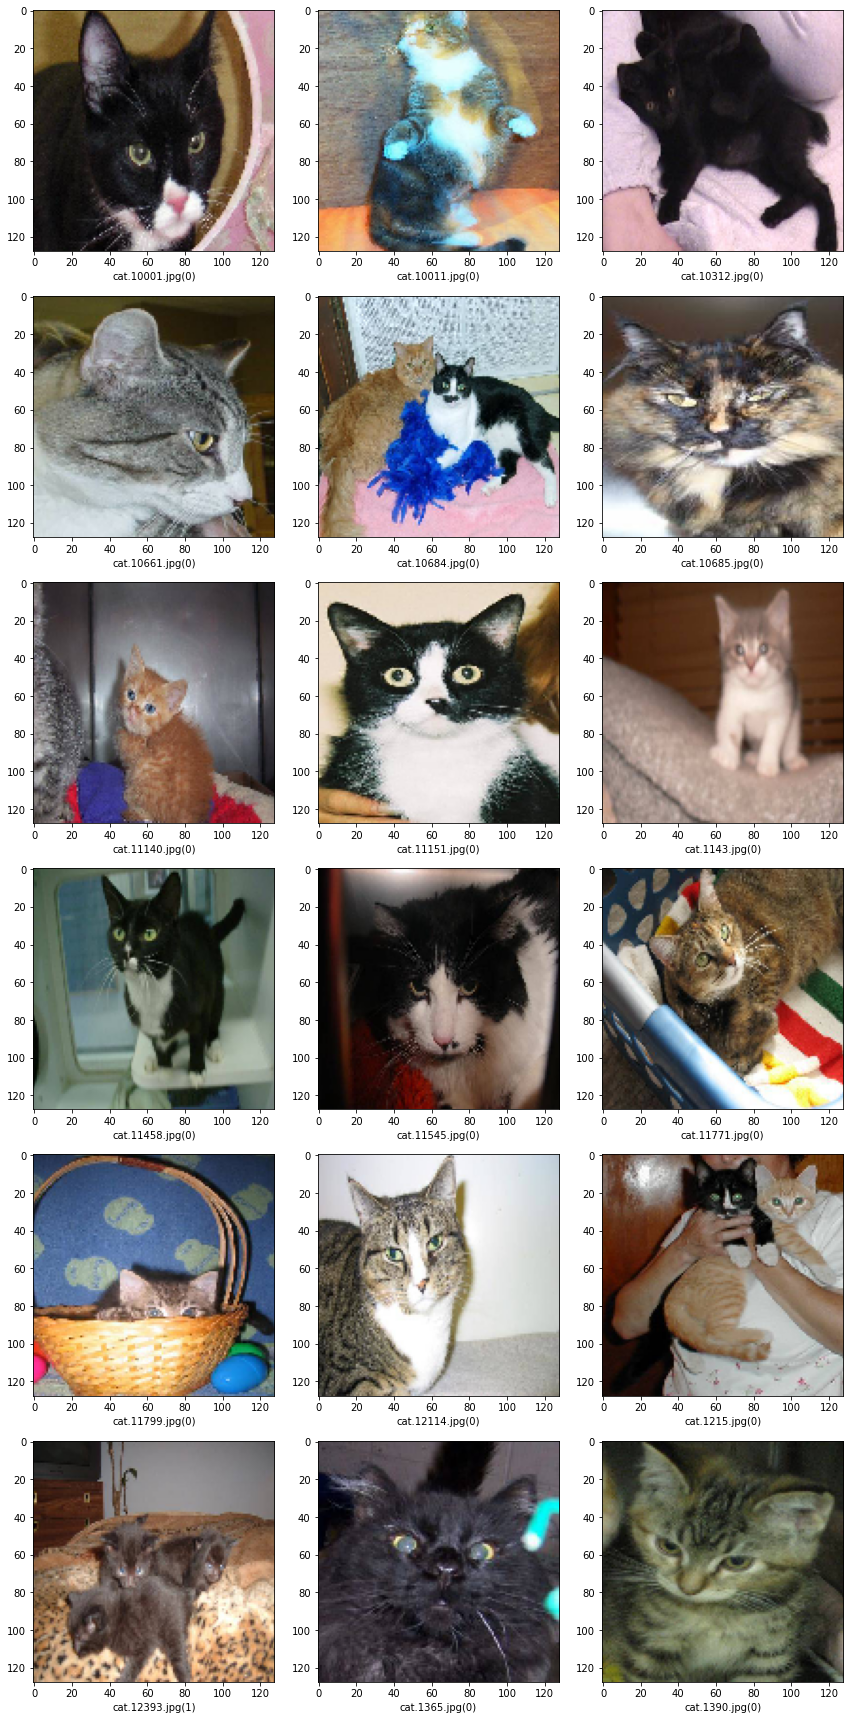

In [48]:
# Testing and Predicting the data, using the above built model and plotting the images for the same along witht their labels.
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("C:/Users/parit/Internship/Data/cats-and-dogs/test/"+filename, target_size=IMAGE_SIZE)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()